In [1]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set()

## Скачайте текст войны и мир. Очистите его, оставив только русские буквы и символы пробела. Постройте матрицу переходных вероятностей.

In [2]:
with open('/Users/mamolchanova/Documents/Обучение/ML/36 занятие - Марковские процессы/Voyna_i_mir.txt', 'r', encoding='utf-8') as f:
    text_ru = f.read().lower()
    text = text_ru
    text.split()
    new_text = ' '.join(text.split())
    text_ru = new_text
    #text_ru=text_ru.replace('  ', ' ', -1)
text_ru = re.sub('[^а-я ]','', text_ru)

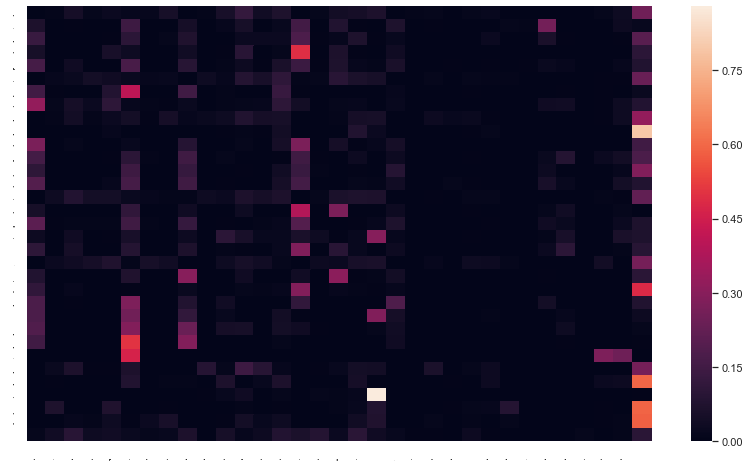

In [3]:
RUSSIAN = 'абвгдежзийклмнопрстуфхцчшщъыьэюя '
POS = {l: i for i, l in enumerate(RUSSIAN)}

probabilities = np.zeros((len(RUSSIAN), len(RUSSIAN)))

for cp, cn in zip(text_ru[:-1], text_ru[1:]):
    probabilities[POS[cp], POS[cn]] += 1
    
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])

df_ru = pd.DataFrame(probabilities, index=(c for c in RUSSIAN), columns=(c for c in RUSSIAN))

plt.figure(figsize=(14,8))
sns.heatmap(df_ru)
plt.show()

## Посчитайте вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р

In [4]:
start = POS['п']
end = POS['р']
prior = 1. / len(RUSSIAN)
for c1 in RUSSIAN:
    proba = prior * probabilities[start, POS[c1]]
    for c2 in RUSSIAN:
        proba = proba * probabilities[POS[c1], POS[c2]]* probabilities[POS[c2], end]
        if proba > 0:
            print(''.join(['п', c1, c2, 'р']), proba)

паар 7.614634133050185e-09
пабр 4.996709670261609e-12
павр 3.5870031572759445e-15
пагр 2.709288330123602e-18
падр 4.9188220590991905e-21
паер 6.381769815440028e-24
пажр 3.446253307124829e-29
пазр 2.483608754260691e-32
паир 3.89343594842435e-37
пайр 6.42004600236672e-42
пакр 1.801792738748732e-44
палр 4.976928011919195e-50
памр 3.244496466530915e-54
панр 2.623091913063378e-58
паор 1.3585644852406086e-63
папр 4.827768357929916e-66
парр 9.735146076698285e-71
паср 3.082436884664788e-74
патр 1.9551602109427932e-76
паур 1.0070846149236617e-80
пафр 2.2000604785262634e-83
пахр 4.112814697205461e-87
пбар 2.4196600530043306e-09
пббр 1.2780942233051397e-13
пбвр 1.0913891248629367e-17
пбгр 4.93703491251622e-22
пбдр 5.0437482051748296e-26
пбер 6.7840656337033e-28
пбжр 9.803916226871353e-35
пбзр 6.309477593830461e-40
пбир 2.8892100614975433e-43
пгар 1.1233041904674339e-08
пеар 6.419806069238666e-08
пебр 7.545599010627172e-11
певр 2.406612218410964e-14
пегр 7.466823294088324e-17
педр 1.94675786887840

## Используя матрицу переходных вероятностей сгенерируйте слово, начинающееся с буквы "Б" и имеющее длину 8-мь символов

In [5]:
s = []
start = 'б'
s.append(start)
length = 8
for i in range(length):
    index = POS[s[i]]
    next_char = np.random.choice(list(RUSSIAN), p=probabilities[index])
    while next_char==' ':
        next_char = np.random.choice(list(RUSSIAN), p=probabilities[index])
    s.append(next_char)
        
    

print (''.join(s))

быдойдяня


## Возьмите ряд и оцените его через HMM

In [6]:
series_dir = '/Users/mamolchanova/Documents/Обучение/ML/34 занятие - Временные ряды/Временные ряды - Общая теория/Series/'

In [7]:
series = pd.read_csv(series_dir+'mean-monthly-air-temperature-deg.csv')['Deg']

In [8]:
from hmmlearn.hmm import GaussianHMM

In [9]:
values = series.values.reshape(-1,1)

In [10]:
for n in range(1, 14):
    model = GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=1000)
    model.fit(values)
    print (n, model.score(values))

1 -855.6201905961935
2 -767.922057651321
3 -729.713099806897
4 -698.3653054078608
5 -659.626887181372
6 -662.2186239870111
7 -623.3212650984146
8 -602.2726720269783
9 -595.131067322986
10 -575.400049183646
11 -567.5109511779349
12 -562.9550305662418
13 -536.824529088831


In [11]:
model = GaussianHMM(n_components=10,
                        covariance_type="diag",
                        n_iter=1000)

In [12]:
model.fit(values)

GaussianHMM(algorithm='viterbi', covariance_type='diag', covars_prior=0.01,
            covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
            min_covar=0.001, n_components=10, n_iter=1000, params='stmc',
            random_state=None, startprob_prior=1.0, tol=0.01,
            transmat_prior=1.0, verbose=False)

In [13]:
labels = model.predict(values)

In [14]:
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]

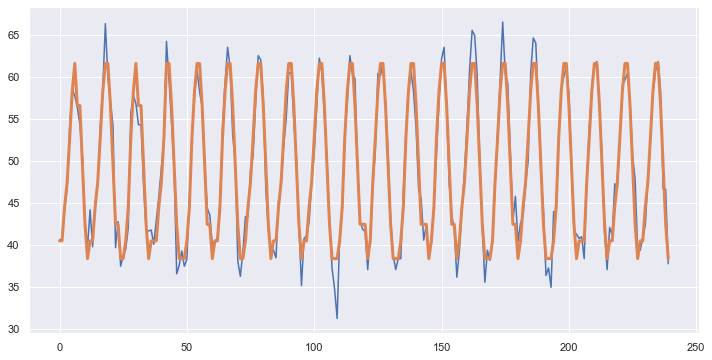

In [15]:
model = GaussianHMM(n_components=10,
                        covariance_type="diag",
                        n_iter=1000)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]
    
plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=3)

## Попробуйте "построить" (через среднее каждой компоненты) наивный прогноз ряда

In [16]:
cur_value = labels[-1]
predictions = []
for _ in range(10):
    cur_value = np.random.choice(10, p=model.transmat_[cur_value])
    predictions.append(model.means_[cur_value])

In [17]:
new_series = np.concatenate((values, np.array(predictions)))

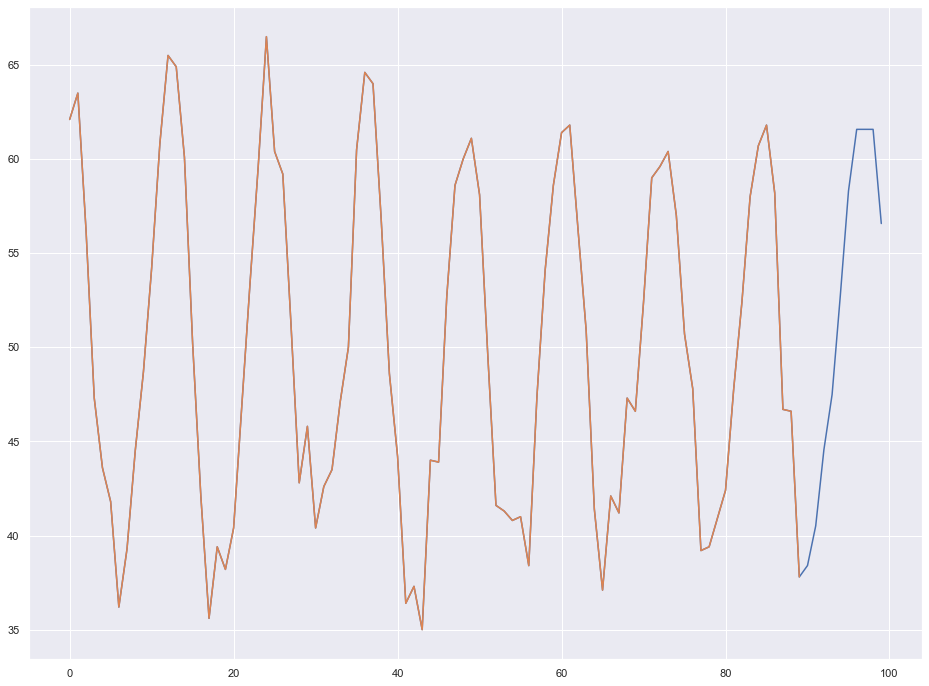

In [18]:
plt.figure(figsize=(16,12))
plt.plot(new_series[-100:])
plt.plot(values[-90:])
plt.show()

In [19]:
cur_value = labels[-11]
predictions = []
for _ in range(10):
    cur_value = np.random.choice(10, p=model.transmat_[cur_value])
    predictions.append(model.means_[cur_value])

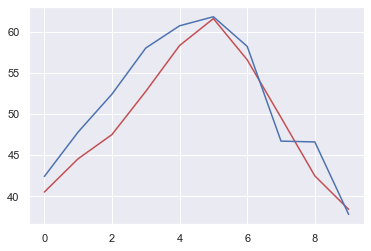

In [20]:
plt.plot(predictions, 'r-')
plt.plot(values[-10:])
plt.show()